# Pelabelan Data Menggunakan Lexicon

In [1]:
import pandas as pd
import re
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize

C:\Users\kuyub\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv("dataset/tweets_clean.csv")

In [19]:
df.head()

,Unnamed: 0,user,date,renderedContent,cleansing,case_folding,tokenize,normalisasi,stopwords,stemming
0,0,abadi11311049,2022-12-30 23:50:34+00:00,@KAI121 @gueduluan Kalau penumpang baru saja m...,Kalau penumpang baru saja masuk umur dan di ap...,kalau penumpang baru saja masuk umur dan di ap...,"['kalau', 'penumpang', 'baru', 'saja', 'masuk'...","['kalau', 'penumpang', 'baru', 'saja', 'masuk'...","['penumpang', 'umur', 'aplikasi', 'pedulilindu...","['tumpang', 'umur', 'aplikasi', 'pedulilindung..."
1,1,KtimunLaut,2022-12-30 23:40:33+00:00,"@beh1ndyouu Paling wajib scan QR, artinya waji...",Paling wajib scan QR artinya wajib vaksin boos...,paling wajib scan qr artinya wajib vaksin boos...,"['paling', 'wajib', 'scan', 'qr', 'artinya', '...","['paling', 'wajib', 'scan', 'qr', 'artinya', '...","['wajib', 'scan', 'qr', 'wajib', 'vaksin', 'bo...","['wajib', 'scan', 'qr', 'wajib', 'vaksin', 'bo..."
2,2,Dio_Nzee,2022-12-30 22:56:07+00:00,"@PinkyStevanie Semoga aja Pink, krn yg udah2 b...",Semoga aja Pink krn yg udah biasa kebalikannya...,semoga aja pink krn yg udah biasa kebalikannya...,"['semoga', 'aja', 'pink', 'krn', 'yg', 'udah',...","['semoga', 'saja', 'pink', 'karena', 'yang', '...","['semoga', 'pink', 'kebalikannya', 'kai', 'pak...","['moga', 'pink', 'balik', 'kai', 'pakai', 'vak..."
3,3,j0s3ph11,2022-12-30 22:39:36+00:00,@KAI121 jadi jika belum dapat vaksin booster b...,jadi jika belum dapat vaksin booster blom bisa...,jadi jika belum dapat vaksin booster blom bisa...,"['jadi', 'jika', 'belum', 'dapat', 'vaksin', '...","['jadi', 'jika', 'belum', 'dapat', 'vaksin', '...","['vaksin', 'booster', 'kakak']","['vaksin', 'booster', 'kakak']"
4,4,jasa_vaksin_,2022-12-30 22:15:30+00:00,"Ready tembak vaksin\r\nVaksin 1,2,3\r\nHapus d...",Ready tembak vaksin Vaksin Hapus data Dll Pros...,ready tembak vaksin vaksin hapus data dll pros...,"['ready', 'tembak', 'vaksin', 'vaksin', 'hapus...","['ready', 'tembak', 'vaksin', 'vaksin', 'hapus...","['ready', 'tembak', 'vaksin', 'vaksin', 'hapus...","['ready', 'tembak', 'vaksin', 'vaksin', 'hapus..."


In [20]:
#membuat kamus kata pada hasil stemming (tweets clean)
word_dict = {}
for i in range(0,len(df['stemming'])):
    sentence = df['stemming'][i]
    word_token = word_tokenize(sentence)
    for j in word_token:
        if j not in word_dict:
            word_dict[j] = 1
        else:
            word_dict[j] += 1

In [21]:
len(word_dict)

8398

In [22]:
len({k:v for (k,v) in word_dict.items() if v < 4})

6671

In [25]:
negasi = ['bukan','tidak','ga','gk']
lexicon = pd.read_csv('kamus/lexicon.csv')
lexicon = lexicon.drop(lexicon[(lexicon['word'] == 'bukan')
                               |(lexicon['word'] == 'tidak')
                               |(lexicon['word'] == 'ga')
                               |(lexicon['word'] == 'gk') ].index,axis=0)
lexicon = lexicon.reset_index(drop=True)

In [26]:
len(lexicon)

10248

In [27]:
lexicon.head(10)

,word,weight,number_of_words
0,hai,3,1
1,merekam,2,1
2,ekstensif,3,1
3,paripurna,1,1
4,detail,2,1
5,pernik,3,1
6,belas,2,1
7,welas,4,1
8,kabung,1,1
9,rahayu,4,1


In [28]:
lexicon_word = lexicon['word'].to_list()
lexicon_num_words = lexicon['number_of_words']

In [29]:
len(lexicon_word)

10248

In [30]:
#membuat array ns_word sebagai tambahan kata dasar
ns_words = []
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for word in word_dict.keys():
    if word not in lexicon_word:
        kata_dasar = stemmer.stem(word)
        if kata_dasar not in lexicon_word:
            ns_words.append(word)
len(ns_words)

6978

In [31]:
len({k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3)) })

1086

In [32]:
ns_words_list = {k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3))}

In [33]:
sort_orders = sorted(ns_words_list.items(), key=lambda x: x[1], reverse=True)
sort_orders=sort_orders[0:20]
for i in sort_orders:
    print(i[0], i[1])

' 66327
, 59025
'vaksin 8867
'booster 7992
[ 7302
] 7302
'covid 976
'stasiun 361
'kakak 355
'syarat 340
'masyarakat 324
'dosis 312
'lanjutusia 301
'prokes 299
'jalan 280
'kota 250
'vaksinasi 248
'tumpang 230
'daerah 213
'jakarta 213


In [34]:
lexicon['number_of_words'].value_counts()

1    9536
2     686
3      24
4       2
Name: number_of_words, dtype: int64

In [35]:
# proses labelling lexicon
sencol =[]
senrow =np.array([])
nsen = 0
factory = StemmerFactory()
stemmer = factory.create_stemmer()
sentiment_list = []

# function to write the word's sentiment if it is founded
def found_word(ind,words,word,sen,sencol,sentiment,add):
    # if it is already included in the bag of words matrix, then just increase the value
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
    #if not, than add new word
        sencol.append(word)
        sen.append(1)
        add += 1
    #if there is a negation word before it, the sentiment would be the negation of it's sentiment
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]
    
    return sen,sencol,sentiment,add
            
# checking every words, if they are appear in the lexicon, and then calculate their sentiment if they do
for i in range(len(df)):
    nsen = senrow.shape[0]
    words = word_tokenize(df['stemming'][i])
    sentiment = 0 
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]
    
    for word in words:
        ind = words.index(word)
        # check whether they are included in the lexicon
        if word in lexicon_word :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        else:
        # if not, then check the root word
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
        # if still negative, try to match the combination of words with the adjacent words
            elif(n_words>1):
                if ind-1>-1:
                    back_1    = words[ind-1]+' '+word
                    if (back_1 in lexicon_word):
                        sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
                    elif(ind-2>-1):
                        back_2    = words[ind-2]+' '+back_1
                        if back_2 in lexicon_word:
                            sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
    # if there is new word founded, then expand the matrix
    if add>0:  
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
    # if there isn't then just update the old matrix
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))
        
    sentiment_list.append(sentiment)

In [36]:
len(sentiment_list)

7302

In [37]:
print(senrow.shape[0])

7302


In [38]:
sencol.append('sentiment')
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
df_sen = pd.DataFrame(sentiment_data,columns = sencol)

In [39]:
df_sen.head(10)

,umur,aplikasi,wajib,lanjut,moga,balik,ready,tembak,hapus,data,...,asam,ngerjain,serempak,umi,pelosok,udeh,kapasitas,ukur,idap,sentiment
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-2
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,-7
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
cek_df = pd.DataFrame([])
cek_df['text'] = df['stemming'].copy()
cek_df['sentiment']  = df_sen['sentiment'].copy()

In [42]:
cek_df.head(30)

,text,sentiment
0,"['tumpang', 'umur', 'aplikasi', 'pedulilindung...",0
1,"['wajib', 'scan', 'qr', 'wajib', 'vaksin', 'bo...",-2
2,"['moga', 'pink', 'balik', 'kai', 'pakai', 'vak...",-2
3,"['vaksin', 'booster', 'kakak']",0
4,"['ready', 'tembak', 'vaksin', 'vaksin', 'hapus...",-7
5,"['informasi', 'medan', 'vaksin', 'booster']",2
6,"['takut', 'vaksin', 'booster']",1
7,"['rumah', 'sakit', 'tinggal', 'habis', 'vaksin...",1
8,"['covid', 'vaksinbooster', 'sayang', 'serik', ...",-1
9,"['nonton', 'konser', 'vaksin', 'booster', 'non...",0


In [45]:
cek_df['sentiment'] = df_sen['sentiment'].copy()
df.loc[cek_df['sentiment']>=0, 'sentiment'] = 1 #positive
df.loc[cek_df['sentiment']<0, 'sentiment'] = -1 #negative
df.loc[cek_df['sentiment']==0, 'sentiment'] = 0 #netral
df.drop(df[cek_df.sentiment==0].index, inplace=True) #buang sentimen netral
df.reset_index()
df

,Unnamed: 0,user,date,renderedContent,cleansing,case_folding,tokenize,normalisasi,stopwords,stemming,sentiment
1,1,KtimunLaut,2022-12-30 23:40:33+00:00,"@beh1ndyouu Paling wajib scan QR, artinya waji...",Paling wajib scan QR artinya wajib vaksin boos...,paling wajib scan qr artinya wajib vaksin boos...,"['paling', 'wajib', 'scan', 'qr', 'artinya', '...","['paling', 'wajib', 'scan', 'qr', 'artinya', '...","['wajib', 'scan', 'qr', 'wajib', 'vaksin', 'bo...","['wajib', 'scan', 'qr', 'wajib', 'vaksin', 'bo...",-1.0
2,2,Dio_Nzee,2022-12-30 22:56:07+00:00,"@PinkyStevanie Semoga aja Pink, krn yg udah2 b...",Semoga aja Pink krn yg udah biasa kebalikannya...,semoga aja pink krn yg udah biasa kebalikannya...,"['semoga', 'aja', 'pink', 'krn', 'yg', 'udah',...","['semoga', 'saja', 'pink', 'karena', 'yang', '...","['semoga', 'pink', 'kebalikannya', 'kai', 'pak...","['moga', 'pink', 'balik', 'kai', 'pakai', 'vak...",-1.0
4,4,jasa_vaksin_,2022-12-30 22:15:30+00:00,"Ready tembak vaksin\r\nVaksin 1,2,3\r\nHapus d...",Ready tembak vaksin Vaksin Hapus data Dll Pros...,ready tembak vaksin vaksin hapus data dll pros...,"['ready', 'tembak', 'vaksin', 'vaksin', 'hapus...","['ready', 'tembak', 'vaksin', 'vaksin', 'hapus...","['ready', 'tembak', 'vaksin', 'vaksin', 'hapus...","['ready', 'tembak', 'vaksin', 'vaksin', 'hapus...",-1.0
5,5,Tree63356707,2022-12-30 22:10:23+00:00,@bobbynasution_ @pemko_medan Pak \r\nMohon inf...,Pak Mohon info RS di medan yang bisa vaksin bo...,pak mohon info rs di medan yang bisa vaksin bo...,"['pak', 'mohon', 'info', 'rs', 'di', 'medan', ...","['pak', 'mohon', 'informasi', 'rs', 'di', 'med...","['informasi', 'medan', 'vaksin', 'booster']","['informasi', 'medan', 'vaksin', 'booster']",1.0
6,6,Gorudenji,2022-12-30 18:46:52+00:00,@Noirditory Jangan takut aku udah vaksin booster,Jangan takut aku udah vaksin booster,jangan takut aku udah vaksin booster,"['jangan', 'takut', 'aku', 'udah', 'vaksin', '...","['jangan', 'takut', 'aku', 'sudah', 'vaksin', ...","['takut', 'vaksin', 'booster']","['takut', 'vaksin', 'booster']",1.0
...,...,...,...,...,...,...,...,...,...,...,...
7296,7994,moanamenfess,2022-10-06 12:40:01+00:00,guys kalo udah ada vaksin booster gausah tes p...,guys kalo udah ada vaksin booster gausah tes p...,guys kalo udah ada vaksin booster gausah tes p...,"['guys', 'kalo', 'udah', 'ada', 'vaksin', 'boo...","['teman-teman', 'kalau', 'sudah', 'ada', 'vaks...","['teman-teman', 'vaksin', 'booster', 'gausah',...","['teman', 'vaksin', 'booster', 'gausah', 'tes'...",-1.0
7297,7995,elshinta_tegal,2022-10-06 12:34:00+00:00,Kemenkes relokasi vaksin booster untuk atasi k...,Kemenkes relokasi vaksin booster untuk atasi k...,kemenkes relokasi vaksin booster untuk atasi k...,"['kemenkes', 'relokasi', 'vaksin', 'booster', ...","['kemenkes', 'relokasi', 'vaksin', 'booster', ...","['relokasi', 'vaksin', 'booster', 'atasi', 'ke...","['relokasi', 'vaksin', 'booster', 'atas', 'bat...",-1.0
7298,7996,RadenRoro93,2022-10-06 12:32:50+00:00,Ceci Christele Plastic girl Unair&amp;Yashmin ...,Ceci Christele Plastic girl UnairampYashmin An...,ceci christele plastic girl unairampyashmin an...,"['ceci', 'christele', 'plastic', 'girl', 'unai...","['ceci', 'christele', 'plastic', 'girl', 'unai...","['ceci', 'christele', 'plastic', 'girl', 'unai...","['ceci', 'christele', 'plastic', 'girl', 'unai...",-1.0
7300,7998,yesungiedf,2022-10-06 12:28:41+00:00,@hereforsuju_ @AllRiseSilver @donghae861015 si...,siap gapapa aku udh vaksin booster pokoknya si...,siap gapapa aku udh vaksin booster pokoknya si...,"['siap', 'gapapa', 'aku', 'udh', 'vaksin', 'bo...","['siap', 'tidakapa-apa', 'aku', 'sudah', 'vaks...","['tidakapa-apa', 'vaksin', 'booster', 'pokoknya']","['tidakapa-apa', 'vaksin', 'booster', 'pokok']",1.0


In [47]:
df.shape

(5921, 11)

In [64]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('user', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)
df.drop('renderedContent', axis=1, inplace=True)
df.drop('cleansing', axis=1, inplace=True)
df.drop('case_folding', axis=1, inplace=True)
df.drop('tokenize', axis=1, inplace=True)
df.drop('normalisasi', axis=1, inplace=True)
df.drop('stopwords', axis=1, inplace=True)
df.rename(columns = {"stemming": "tweets"}, inplace=True)

In [65]:
df

,tweets,sentiment
1,"['wajib', 'scan', 'qr', 'wajib', 'vaksin', 'bo...",-1.0
2,"['moga', 'pink', 'balik', 'kai', 'pakai', 'vak...",-1.0
4,"['ready', 'tembak', 'vaksin', 'vaksin', 'hapus...",-1.0
5,"['informasi', 'medan', 'vaksin', 'booster']",1.0
6,"['takut', 'vaksin', 'booster']",1.0
...,...,...
7296,"['teman', 'vaksin', 'booster', 'gausah', 'tes'...",-1.0
7297,"['relokasi', 'vaksin', 'booster', 'atas', 'bat...",-1.0
7298,"['ceci', 'christele', 'plastic', 'girl', 'unai...",-1.0
7300,"['tidakapa-apa', 'vaksin', 'booster', 'pokok']",1.0


In [66]:
df.to_csv('dataset/tweets_labelled.csv')
# df.to_excel('dataset/tweets_labelled.xlsx')

In [3]:
df = pd.read_csv('dataset/tweets_labelled.csv')
df['sentiment'].value_counts()

 1.0    4042
-1.0    1879
Name: sentiment, dtype: int64

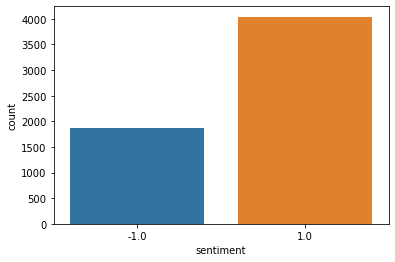

In [9]:
sns.countplot(x="sentiment", data=df)
plt.savefig('output/plot_count_sentiment_pos_neg.png')

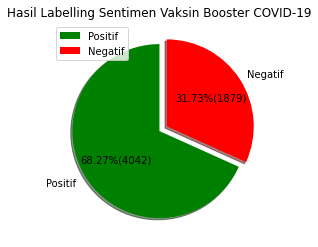

In [3]:
# counts labelling sentimen dengan lexicon
values = [4042, 1879]
explode = [0, 0.1]
labels = ['Positif ', 'Negatif']
colors = ['green', 'red']

def make_autopct(values):
    def my_autopct(pct):
        total  = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(values, colors=colors, labels=labels, explode=explode,
      autopct=make_autopct(values), shadow=True, startangle=90)
plt.legend()
plt.title("Hasil Labelling Sentimen Vaksin Booster COVID-19")
plt.savefig('output/plot_pie_sentiment_pos_neg.png')
plt.show()

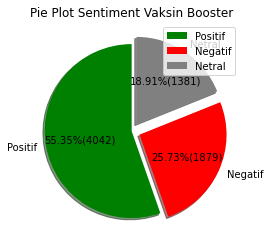

In [10]:
values = [4042, 1879, 1381]
explode = [0, 0.1, 0.1]
labels = ['Positif', 'Negatif', 'Netral']
colors = ['green', 'red', 'grey']

def make_autopct(values):
    def my_autopct(pct):
        total  = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(values, colors=colors, labels=labels, explode=explode,
      autopct=make_autopct(values), shadow=True, startangle=90)
plt.legend()
plt.title("Pie Plot Sentiment Vaksin Booster")
plt.savefig('output/plot_pie_sentiment_pos_neu_neg.png')
plt.show()